5주차 과제
1번

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
X = pd.read_csv('C:/Users/고정우/Desktop/머신러닝 실습/과제/data0405.csv', usecols=['x']).values
Y = pd.read_csv('C:/Users/고정우/Desktop/머신러닝 실습/과제/data0405.csv', usecols=['y']).values

Training Data 확인

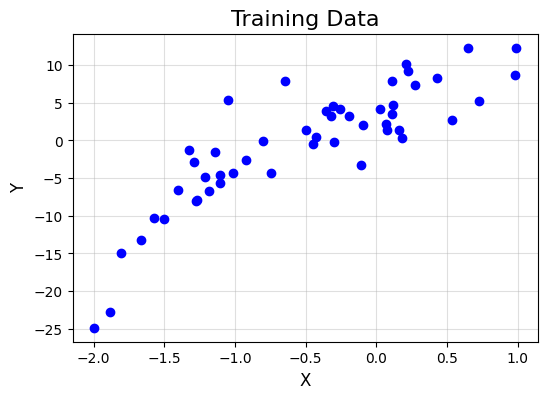

In [115]:
plt.figure(figsize=(6, 4))
plt.plot(X, Y, 'bo')
plt.title("Training Data", fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.grid(alpha = 0.4)
plt.show()

선형 예측 모델의 파라미터 값

In [116]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1, 1)

A = np.hstack([X**0, X])
A = np.asmatrix(A)

w = (A.T @ A).I @ A.T @ Y
print(w)


[[3.94188011]
 [8.73592461]]


예측 모델

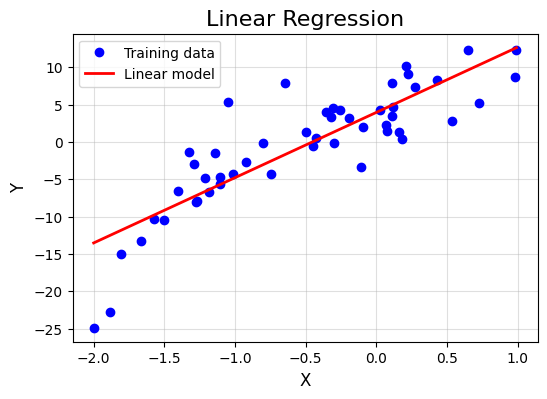

In [117]:
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(X, Y, 'bo', label = "Training data")

xp = np.linspace(min(X), max(X), 100)
yp = w[0,0] + w[1,0]*xp
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

비선형 예측 모델

2차 비선형 예측 모델의 파라미터 값

In [118]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1, 1)

A = np.hstack([X**0, X, X**2])
A = np.asmatrix(A)

w = (A.T @ A).I @ A.T @ Y
print(w)


[[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]


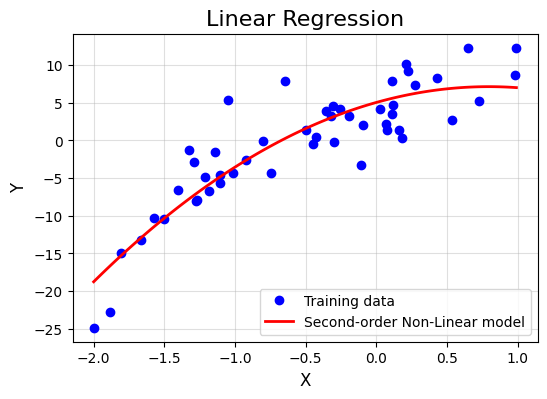

In [119]:
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(X, Y, 'bo', label = "Training data")

xp = np.linspace(min(X), max(X), 100)
yp = w[0,0] + w[1,0]*xp + w[2, 0]*xp**2
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Second-order Non-Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

10차 비선형 예측 모델의 파라미터 값

In [120]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1, 1)

A = np.hstack([X**0, X, X**2,
               X**3, X**4, X**5,
               X**6, X**7, X**8, X**9, X**10])
A = np.asmatrix(A)

w = (A.T @ A).I @ A.T @ Y
print(w)


[[  2.70561083]
 [  8.7466358 ]
 [ 24.11081425]
 [ -7.17740036]
 [-70.59489886]
 [-20.12073852]
 [ 59.53548267]
 [ 36.49128205]
 [ -8.88620221]
 [-11.06845286]
 [ -2.15841389]]


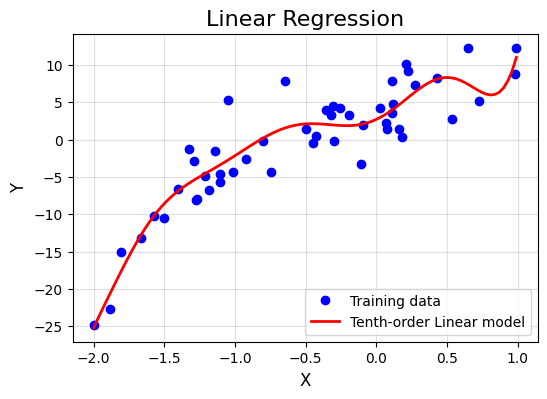

In [121]:
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(X, Y, 'bo', label = "Training data")

xp = np.linspace(min(X), max(X), 100)
yp = (
    w[0,0] + w[1,0]*xp + w[2, 0]*xp**2 + w[3, 0]*xp**3 + w[4, 0]*xp**4
+ w[5, 0]*xp**5 + w[6, 0]*xp**6 + w[7, 0]*xp**7 
+ w[8, 0]*xp**8 + w[9, 0]*xp**9 + w[10, 0]*xp**10
)
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Tenth-order Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

5주차 과제 2번

경사하강법

선형 예측 모델

In [122]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1, 1)

w0 = 0
w1 = 0

alpha = 0.001
epochs = 500

n = float(len(X))

#경사하강법
for i in range(epochs):
    yp = w1*X + w0
    dw1 = (1/n) * sum(X * (yp - Y))
    dw0 = (1/n) * sum(yp - Y)
    w1 = w1 - alpha * dw1
    w0 = w0 - alpha * dw0
print(w0, "\n",w1)


[0.06825886] 
 [2.23603262]


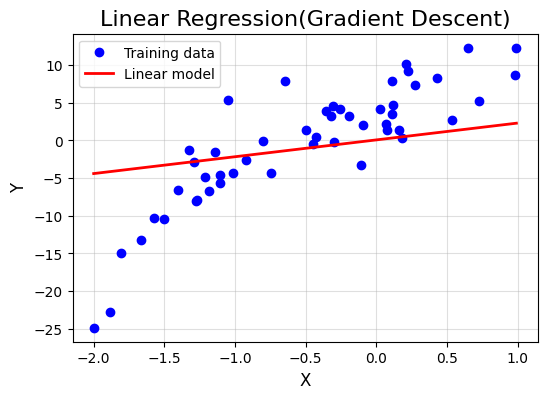

In [123]:
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(X, Y, 'bo', label = "Training data")

xp = np.linspace(min(X), max(X), 100)
y_pred = w1*xp + w0  # 예측값을 만든다.
#print(y_pred)
plt.plot(xp, y_pred, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

2차

In [124]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1, 1)

A = np.hstack([X**0, X, X**2])
A = np.asmatrix(A)

w = ([[0], [0], [0]])

alpha = 0.001
epochs = 500

n = float(len(X))

#경사하강법
for i in range(epochs):
    dJ = 2 * (A.T @ A @ w - A.T @ Y)
    w = w - alpha * dJ

print(w)


[[ 5.03916346]
 [ 5.2785808 ]
 [-3.31725603]]


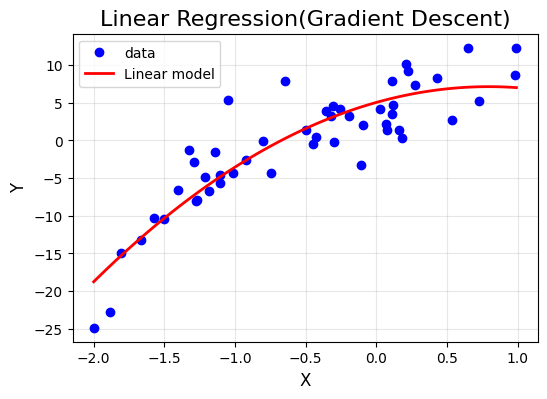

In [125]:
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(X, Y, 'bo', label = "data")

xp = np.linspace(min(X), max(X), 100)
yp = w[0,0] + w[1,0]*xp + w[2, 0] * xp ** 2

plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

4차

In [126]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1, 1)

A = np.hstack([X**0, X, X**2, X**3, X**4])
A = np.asmatrix(A)

w = ([[0], [0], [0], [0], [0]])

alpha = 0.001
epochs = 500

n = float(len(X))

#경사하강법
for i in range(epochs):
    dJ = 2 * (A.T @ A @ w - A.T @ Y)
    w = w - alpha * dJ

print(w)


[[ 8.43161911e+23]
 [-1.25888267e+24]
 [ 2.08277519e+24]
 [-3.51407748e+24]
 [ 6.17021795e+24]]


alpha가 0.001일 때

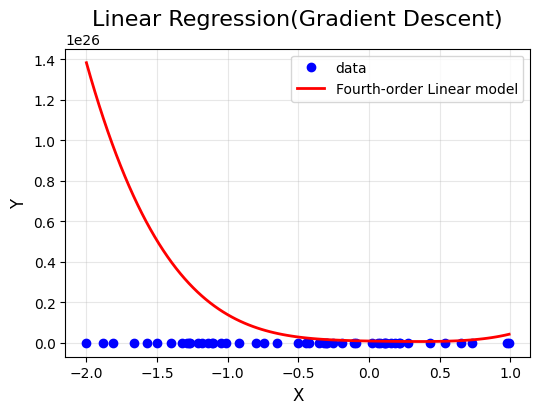

In [127]:
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(X, Y, 'bo', label = "data")

xp = np.linspace(min(X), max(X), 100)
yp = w[0,0] + w[1,0]*xp + w[2, 0]*xp**2 + w[3, 0]*xp**3 + w[4, 0]*xp**4

plt.plot(xp, yp, 'r', linewidth = 2, label = "Fourth-order Linear model")
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

alpha가 0.0001일 때

In [128]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1, 1)

A = np.hstack([X**0, X, X**2, X**3, X**4])
A = np.asmatrix(A)

w = ([[0], [0], [0], [0], [0]])

alpha = 0.0001
epochs = 500

n = float(len(X))

#경사하강법
for i in range(epochs):
    dJ = 2 * (A.T @ A @ w - A.T @ Y)
    w = w - alpha * dJ

print(w)


[[ 3.55242938]
 [ 2.83675336]
 [ 0.55522403]
 [ 2.38973336]
 [-0.36598114]]


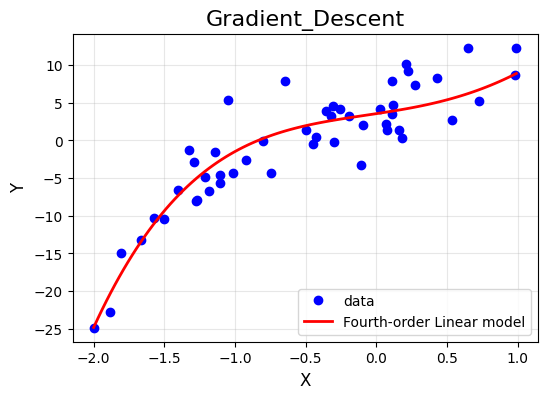

In [129]:
plt.figure(figsize = (6, 4))
plt.title('Gradient_Descent', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(X, Y, 'bo', label = "data")

xp = np.linspace(min(X), max(X), 100)
yp = w[0,0] + w[1,0]*xp + w[2, 0]*xp**2 + w[3, 0]*xp**3 + w[4, 0]*xp**4

plt.plot(xp, yp, 'r', linewidth = 2, label = "Fourth-order Linear model")
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

5주차 과제 3번

선형 예측 모델
<br>
<br>
>최소제곱법
<br>
>><br>w0 = [3.94188011]
<br>
w1 = [8.73592461]
<br>
<br>

>경사하강법
<br>
>><br>w0 = [0.06825886]
<br>
w1 = [2.23603262]
<br>
<br>

2차 예측 모델
<br>
<br>
>최소제곱법
<br>
>><br>w0 = [ 5.03906362]
<br>
w1 = [ 5.27924916]
<br>
w2 = [-3.31676315]
<br>
<br>

>경사하강법
<br>
>><br> w0 = [ 5.03916346]
<br> w1 = [ 5.2785808 ]
<br> w2 = [-3.31725603]
<br>
<br>

>10차 최소제곱법을 이용한 비선형 모델의 파라미터
>><br>w0 = [  2.70561083]
<br>
w1 = [  8.7466358 ]
<br>
w2 = [ 24.11081425]
<br>
w3 = [ -7.17740036]
<br>
w4 = [-70.59489886]
<br>
w5 = [-20.12073852]
<br>
w6 = [ 59.53548267]
<br>
w7 = [ 36.49128205]
<br>
w8 = [ -8.88620221]
<br>
w9 = [-11.06845286]
<br>
w10 = [ -2.15841389]
<br>
<br>

>4차 경사하강법을 이용한 비선형 모델의 파라미터
<br> 학습률을 0.001로 하면 학습이 제대로 이루어지지 않아 0.0001로 바꾸었다.
>><br>w0 = [ 3.55242938]
<br>
w1 = [ 2.83675336]
<br>
w2 = [ 0.55522403]
<br>
w3 = [ 2.38973336]
<br>
w4 = [-0.36598114]
<br>
<br>